# Webscrapping de datos de la noticias de la Casa Rosada

Documentación oficial: [ReadTheDocs](https://beautiful-soup-4.readthedocs.io/en/latest/) 

Información adicional sobre ``beautifulSoup``: [j3logo.com](https://j2logo.com/python/web-scraping-con-python-guia-inicio-beautifulsoup/)

Alternativa para webscrappig de sitios de noticias: [newspaper](http://theautomatic.net/2020/08/05/how-to-scrape-news-articles-with-python/)

In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

### 1. Cargar la página con 'request'

El módulo ``request`` permite envíar peticiones HTTP usando Python

The requests module allows you to send HTTP requests using Python.

La petición HTTP devuelve un Objeto Response con toda la información obtenida (contenido, encoding, status, y demás). 

Para obtener el contenido de una página HTML y el status:


In [5]:
url = 'https://www.casarosada.gob.ar/informacion/actividad-oficial' 
res = requests.get(url)
txt = res.text
status = res.status_code
soup = BeautifulSoup(res.text, 'lxml')

print(txt, status)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="es-es" lang="es-es" dir="ltr" >
<head  prefix="og: http://ogp.me/ns#">
    <base href="https://www.casarosada.gob.ar/informacion/actividad-oficial" />
  <meta http-equiv="content-type" content="text/html; charset=utf-8" />
  <meta name="description" content="Enterate de todas las actividades del gobierno nacional. Sitio Oficial de la Casa Rosada" />
  <meta name="generator" content="Joomla! - Open Source Content Management" />
  <title>ACTIVIDAD OFICIAL</title>
  <link href="/informacion/actividad-oficial?format=feed&amp;type=rss" rel="alternate" type="application/rss+xml" title="RSS 2.0" />
  <link href="/informacion/actividad-oficial?format=feed&amp;type=atom" rel="alternate" type="application/atom+xml" title="Atom 1.0" />
  <link href="/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon" />
  <link

In [6]:
news_panel = soup.find_all('div', class_='body')

### Paso 2: Iteramos por cada bloque, para obtener el título, la fecha y el link (solo primera página)

In [7]:
for news_item in news_panel:
    print('========================')
    time = news_item.find('time').get_text()
    news = news_item.find('h3').get_text()
    for link in news_item.find_all('a'):
        href = link.get('href')
        print(href)
        links.append(href)
    print(time.strip())
    print(news)

#### Ahora, repetimos lo anterior pero para las primeras 10 páginas
Existen, al momento de escribir este notebook, 173 páginas.
Hay que tener cuidado con que nuestra IP no sea _banneada_ del sitio por repetidos intentos de conexión.
Vamos a descagar sólo las primeras 10 páginas 

In [8]:
# import re
news_block = []
# we can also perform searching by attribute values
# news_panel = soup.find_all(class_='panel-body')
# print(news_panel)
# print(news_panel)
for i in range(0,360,40):
    url = 'https://www.casarosada.gob.ar/informacion/actividad-oficial?start=' + str(i) 
    res = requests.get(url)
    txt = res.text
    status = res.status_code
    soup = BeautifulSoup(res.text, 'lxml')
    # print(txt)
    links = []
    news_panel = soup.find_all(class_='item')
    insert = []
    for news_item in news_panel:
        print('========================')
        time = news_item.find('time').get_text()
        time = time.strip()
        news = news_item.find('h3').get_text()
        for link in news_item.find_all('a'):
            href = link.get('href')
            print(href)
            links.append(href)
        print(time)
        print(news)
        insert = [time, news, href]
        news_block.append(insert)

/slider-principal/49110-el-presidente-asistio-en-lujan-a-la-misa-por-la-paz-y-la-fraternidad-de-los-argentinos
Sábado 10 de Septiembre de 2022
El presidente asistió en Luján a la "Misa por la paz y la fraternidad de los argentinos"
/informacion/actividad-oficial/9-noticias/49109-el-presidente-se-reunio-con-el-gobernador-de-la-provincia-de-buenos-aires-axel-kicillof
Viernes 09 de Septiembre de 2022
El presidente se reunió con el gobernador de la provincia de Buenos Aires, Axel Kicillof
/informacion/actividad-oficial/9-noticias/49108-el-presidente-se-reunio-con-los-directivos-de-la-empresa-estatal-de-desarrollo-de-energia-powerchina
Viernes 09 de Septiembre de 2022
El presidente se reunió con los directivos de la empresa estatal de desarrollo de energía, PowerChina
/slider-principal/49107-el-presidente-recibio-al-ceo-del-grupo-mabe-empresa-lider-en-produccion-de-electrodomesticos-en-america-latina-que-anuncio-una-inversion-de-20-millones-de-dolares
Viernes 09 de Septiembre de 2022
El pre

/slider-principal/49035-alberto-fernandez-entrego-viviendas-e-inauguro-un-jardin-de-infantes-en-la-rioja
Miércoles 17 de Agosto de 2022
Alberto Fernández entregó viviendas e inauguró un jardín de infantes en La Rioja
/slider-principal/49032-alberto-fernandez-el-desafio-que-tenemos-es-seguir-haciendo-crecer-a-la-argentina-en-libertad-y-democracia
Miércoles 17 de Agosto de 2022
Alberto Fernández: “El desafío que tenemos es seguir haciendo crecer a la Argentina en libertad y democracia”
/informacion/actividad-oficial/9-noticias/49030-el-presidente-recibio-a-la-directora-de-la-organizacion-panamericana-de-la-salud-carissa-etienne
Martes 16 de Agosto de 2022
El presidente recibió a la directora de la Organización Panamericana de la Salud, Carissa Etienne
/slider-principal/49028-alberto-fernandez-el-mundo-reclama-litio-como-energia-y-tenemos-la-oportunidad-de-brindarlo
Martes 16 de Agosto de 2022
Alberto Fernández: "El mundo reclama litio como energía y tenemos la oportunidad de brindarlo"
/

/informacion/actividad-oficial/9-noticias/48947-el-presidente-recibio-a-referentes-de-organizaciones-sociales
Miércoles 13 de Julio de 2022
El presidente recibió a referentes de organizaciones sociales
/slider-principal/48945-el-presidente-inauguro-un-espacio-de-primera-infancia-en-general-rodriguez
Miércoles 13 de Julio de 2022
El presidente inauguró un Espacio de Primera Infancia en General Rodríguez
/slider-principal/48943-el-presidente-recibio-al-ex-mandatario-de-bolivia-evo-morales
Martes 12 de Julio de 2022
El presidente recibió al ex mandatario de Bolivia, Evo Morales
/slider-principal/48941-el-presidente-se-reunio-con-el-ministro-de-defensa-jorge-taiana
Lunes 11 de Julio de 2022
El presidente se reunió con el ministro de Defensa, Jorge Taiana
/slider-principal/48940-el-gobierno-puso-en-marcha-la-obra-publica-numero-5-000-y-se-encamina-a-alcanzar-los-500-000-puestos-de-trabajo-registrado-en-la-construccion
Lunes 11 de Julio de 2022
El Gobierno puso en marcha la obra pública núme

/slider-principal/48873-el-presidente-le-tomo-juramento-al-nuevo-ministro-de-desarrollo-productivo-daniel-scioli
Miércoles 15 de Junio de 2022
El presidente le tomó juramento al nuevo ministro de Desarrollo Productivo, Daniel Scioli
/slider-principal/48870-el-presidente-anuncio-el-inicio-de-las-obras-de-ampliacion-de-las-plantas-potabilizadoras-de-las-ciudades-de-santa-fe-y-rosario
Miércoles 15 de Junio de 2022
El presidente anunció el inicio de las obras de ampliación de las Plantas Potabilizadoras de las ciudades de Santa Fe y Rosario
/slider-principal/48869-el-presidente-analizo-junto-al-gabinete-el-incremento-en-el-trabajo-registrado-que-alcanzo-a-las-12-6-millones-de-personas
Miércoles 15 de Junio de 2022
El presidente analizó junto al gabinete el incremento en el trabajo registrado, que alcanzó a las 12,6 millones de personas
/slider-principal/48866-el-presidente-encabezo-la-firma-de-un-convenio-entre-educacion-y-seguridad-para-fortalecer-la-formacion-de-las-fuerzas-policiales
Ma

/slider-principal/48773-el-presidente-llego-a-san-juan-donde-recorrera-y-entregara-viviendas-junto-al-gobernador-unac
Jueves 19 de Mayo de 2022
El presidente llegó a San Juan donde recorrerá y entregará viviendas junto al gobernador Uñac
/slider-principal/48771-alberto-fernandez-el-indec-pudo-tomar-una-foto-de-la-argentina-que-nos-va-a-permitir-trabajar-en-el-futuro
Jueves 19 de Mayo de 2022
Alberto Fernandez: “El INDEC pudo tomar una foto de la Argentina que nos va a permitir trabajar en el futuro”
/informacion/actividad-oficial/9-noticias/48769-el-presidente-recibio-a-un-grupo-de-censistas-en-casa-rosada
Martes 17 de Mayo de 2022
El presidente recibió a un grupo de censistas en Casa Rosada
/slider-principal/48768-el-presidente-recibio-a-los-representantes-del-parlamento-patagonico
Martes 17 de Mayo de 2022
El presidente recibió a los representantes del Parlamento Patagónico
/informacion/actividad-oficial/9-noticias/48765-el-presidente-alberto-fernandez-mantuvo-un-encuentro-bilateral-

/slider-principal/48682-el-presidente-puso-en-marcha-la-estrategia-federal-de-abordaje-integral-de-la-salud-mental
Lunes 25 de Abril de 2022
El presidente puso en marcha la Estrategia Federal de Abordaje Integral de la Salud Mental
/slider-principal/48679-el-presidente-recorrio-una-obra-de-saneamiento-en-moreno
Viernes 22 de Abril de 2022
El presidente recorrió una obra de saneamiento en Moreno 
/slider-principal/48678-cerruti-el-gasoducto-nestor-kirchner-va-a-permitir-que-la-argentina-recupere-la-soberania-energetica
Viernes 22 de Abril de 2022
Cerruti: “El gasoducto Néstor Kirchner va a permitir que la Argentina recupere la soberanía energética”
/informacion/actividad-oficial/9-noticias/48675-el-presidente-entrego-viviendas-en-la-ciudad-de-neuquen
Jueves 21 de Abril de 2022
El presidente entregó viviendas en la ciudad de Neuquén
/informacion/actividad-oficial/9-noticias/48674-asi-sera-la-obra-del-gasoducto-nestor-kirchner
Jueves 21 de Abril de 2022
Así será la obra del gasoducto Nest

/slider-principal/48596-cada-peso-que-ponemos-en-materia-educativa-es-una-inversion-afirmo-el-presidente-al-inaugurar-el-nuevo-edificio-de-una-escuela-tecnica-en-parana-2
Miércoles 23 de Marzo de 2022
”Cada peso que ponemos en materia educativa es una inversión”, afirmó el presidente al inaugurar el nuevo edificio de una escuela técnica en Paraná
/slider-principal/48593-el-presidente-llego-a-entre-rios-donde-encabezara-la-inauguracion-del-nuevo-edificio-de-la-escuela-de-educacion-tecnica-n-100-de-parana
Miércoles 23 de Marzo de 2022
El presidente llegó a Entre Ríos, donde encabezará la inauguración del nuevo edificio de la escuela de educación técnica N° 100 de Paraná
/slider-principal/48591-el-presidente-recibio-a-representantes-de-la-minera-china-zijin-que-realizan-millonaria-inversion-en-catamarca
Martes 22 de Marzo de 2022
El presidente recibió a representantes de la minera china Zijin, que realizan millonaria inversión en Catamarca
/informacion/actividad-oficial/9-noticias/48590-e

/slider-principal/48520-el-gobierno-nacional-firmo-convenios-por-mas-de-75-000-millones-de-pesos-con-la-provincia-de-buenos-aires
Jueves 03 de Marzo de 2022
El Gobierno nacional firmó convenios por más de 75.000 millones de pesos con la provincia de Buenos Aires
/slider-principal/48518-la-humanidad-no-debe-resignarse-ante-la-guerra-que-arrasa-con-dolor-y-destruccion-a-miles-de-familias-dijo-el-presidente
Jueves 03 de Marzo de 2022
"La humanidad no debe resignarse ante la guerra, que arrasa con dolor y destrucción a miles de familias”, dijo el presidente
/slider-principal/48517-queremos-tomarnos-el-tiempo-necesario-para-defender-los-derechos-de-los-argentinos-y-argentinas
Jueves 03 de Marzo de 2022
“Queremos tomarnos el tiempo necesario para defender los derechos de los argentinos y argentinas”
/slider-principal/48511-el-presidente-se-reunio-con-el-director-del-indec-marco-lavagna-con-miras-al-censo-2022
Miércoles 02 de Marzo de 2022
El presidente se reunió con el director del Indec, Ma

/slider-principal/48426-el-presidente-arribo-a-rusia-donde-manana-se-reunira-con-su-par-vladimir-putin
Miércoles 02 de Febrero de 2022
El presidente arribó a Rusia, donde mañana se reunirá con su par Vladímir Putin
/slider-principal/48424-el-presidente-alberto-fernandez-dio-inicio-a-su-gira-por-rusia-china-y-barbados
Martes 01 de Febrero de 2022
El presidente Alberto Fernández dio inicio a su gira por Rusia, China y Barbados
/slider-principal/48419-este-tiene-que-ser-el-ano-de-la-educacion-sostuvo-el-presidente-al-recorrer-una-planta-grafica-donde-se-imprimen-los-ejemplares-del-programa-libros-para-aprender
Lunes 31 de Enero de 2022
“Este tiene que ser el año de la educación”, sostuvo el presidente al recorrer una planta gráfica donde se imprimen los ejemplares del programa “Libros para aprender”
/informacion/actividad-oficial/9-noticias/48423-alberto-fernandez-el-acuerdo-con-el-fmi-nos-permite-que-en-la-argentina-se-siga-invirtiendo-produciendo-y-generando-trabajo
Lunes 31 de Enero de

In [9]:
for item in news_block:
    print('-------------------------------------------------------_')
    print(item)

-------------------------------------------------------_
['Sábado 10 de Septiembre de 2022', 'El presidente asistió en Luján a la "Misa por la paz y la fraternidad de los argentinos"', '/slider-principal/49110-el-presidente-asistio-en-lujan-a-la-misa-por-la-paz-y-la-fraternidad-de-los-argentinos']
-------------------------------------------------------_
['Viernes 09 de Septiembre de 2022', 'El presidente se reunió con el gobernador de la provincia de Buenos Aires, Axel Kicillof', '/informacion/actividad-oficial/9-noticias/49109-el-presidente-se-reunio-con-el-gobernador-de-la-provincia-de-buenos-aires-axel-kicillof']
-------------------------------------------------------_
['Viernes 09 de Septiembre de 2022', 'El presidente se reunió con los directivos de la empresa estatal de desarrollo de energía, PowerChina', '/informacion/actividad-oficial/9-noticias/49108-el-presidente-se-reunio-con-los-directivos-de-la-empresa-estatal-de-desarrollo-de-energia-powerchina']
-------------------------

### Paso 3: Obtener la nota completa, el título y la fecha de cada link.

In [10]:
base_url = 'https://www.casarosada.gob.ar'

# Definimos los elementos a usar en el bucle
site = []
dict_news = {}
i=0

# Arrancamos del 1 y no del 0 porque el 1 es un comunicado de prensa, que tiene otros estilo para el párrafo
# Hay que ver como se modifica la noticia con el paso de los dias
# news_block_ = news_block[1:5]
for item in news_block:
    i = i+1
    strip_news = ''
    
    # Creamos la variable donde se guarda el link con la noticia a descargar.
    url = base_url + item[2]
    res = requests.get(url)
    txt = res.text
    soup = BeautifulSoup(res.text, 'lxml')
    title = soup.find('h2', attrs={'class': None}).get_text()
    date = soup.find('time', class_='pull-right').get_text().strip()
    body = soup.find_all('p', attrs={'class':None})
    # Armamos un for para limpiar cada elemento del find_all
    for p_element in body:
        strip_news = strip_news + p_element.text
    # Cargamos las noticias en un dict
    dict_news.update({i:{'title':title,
                    'date':date,
                    'body':strip_news}
                    })

### Paso 4: Guardamos toda la info en un dataframes, y lo respaldamos en un _.csv_ en nuestro disco.

In [15]:
df = pd.DataFrame(dict_news).transpose()

In [16]:
df

,title,date,body
1,"El presidente asistió en Luján a la ""Misa por ...",Sábado 10 de septiembre de 2022,El presidente Alberto Fernández asistió este m...
2,El presidente se reunió con el gobernador de l...,Viernes 09 de septiembre de 2022,El presidente Alberto Fernández recibió esta t...
3,El presidente se reunió con los directivos de ...,Viernes 09 de septiembre de 2022,El presidente Alberto Fernández recibió esta t...
4,"El presidente recibió al CEO del Grupo MABE, e...",Viernes 09 de septiembre de 2022,El presidente Alberto Fernández recibió esta t...
5,El presidente analizó con Daniel Scioli los ej...,Viernes 09 de septiembre de 2022,El presidente Alberto Fernández recibió esta m...
...,...,...,...
356,“Nunca olviden el compromiso que tienen con el...,Miércoles 22 de diciembre de 2021,“Nunca olviden que ustedes son el resultado de...
357,El presidente mantuvo este mediodía una reunió...,Martes 21 de diciembre de 2021,El presidente Alberto Fernández mantuvo este m...
358,El presidente anunció un bono de 20.000 pesos ...,Martes 21 de diciembre de 2021,El presidente Alberto Fernández anunció este m...
359,“Voy a invertir todo lo que haga falta en educ...,Lunes 20 de diciembre de 2021,“Mientras me toque ser presidente voy a inver...


In [17]:
df.to_csv('casa_rosada_noticas_webscrapping.csv', index= False)

In [18]:
df = pd.read_csv('casa_rosada_noticas_webscrapping.csv')

## Word cloud

In [22]:
# !pip install nltk

In [23]:
import nltk
from nltk.tokenize import word_tokenize

In [24]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /home/mato/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# !pip install pillow wordcloud

In [26]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [27]:
def preprocessing(data, added_stop_words):
    # Cargamos las 'stop words' en español
    stop_words = nltk.corpus.stopwords.words('spanish')
    # Convertimos el texto a minúsculas
    data = data.str.lower()
    
    # Concatenamos todas las celdas de la columna, separando con un espacio,
    # para armar un gran texto con todas las noticias unidas.
    paragraph = ' '.join(data)
    
    # _tokenizamos_ el párrafo con el tokenizados que trae nlpk
    # tokinizar siginifica dividir el párrafo una lista, con cada elemento siendo una palabra
    word_tokens = word_tokenize(paragraph) 
    
    # Filtramos las palabras del párrafo que están en la lista de 'stop words'
    preprocessing_result = ' '.join([word for word in word_tokens if not word in stop_words])
    word_tokens_added = word_tokenize(preprocessing_result)
    preprocessing_result = ' '.join([word for word in word_tokens_added if not word in added_stop_words])
    # Devolvemos un sólo párrafo, procesado.
    return preprocessing_result


In [28]:
words = preprocessing(df['body'], [])

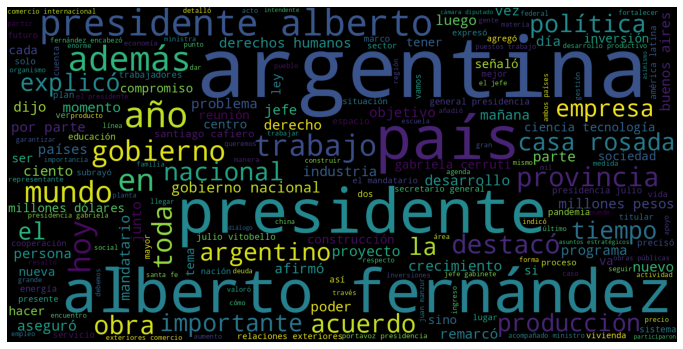

In [29]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, random_state=1, background_color="black").generate(words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
# Grabamos la imagen
wordcloud.to_file('word_cloud_casa_rosada.png')

### Alternativa: Agregando _stop_words_ por fuera de la lista de nlpk

In [31]:
added = ['alberto fernández','argentina', 'alberto', 'fernández', 'presidente']
words = preprocessing(df['body'], added)

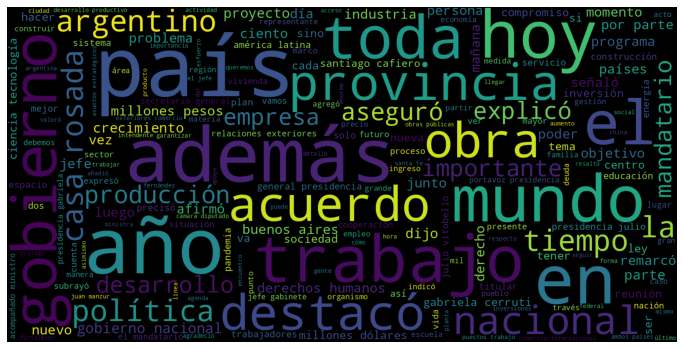

In [32]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, random_state=1, background_color="black").generate(words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Alternativa: Silueta en la nube

In [33]:
# Importing Libraries
from PIL import Image
import numpy as np

# Import image to np.array
mask = np.array(Image.open('comment.png'))

In [34]:
# Generate word cloud
wordcloud2 = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="purple",
    colormap="Set2",
    mask=mask
).generate(words)



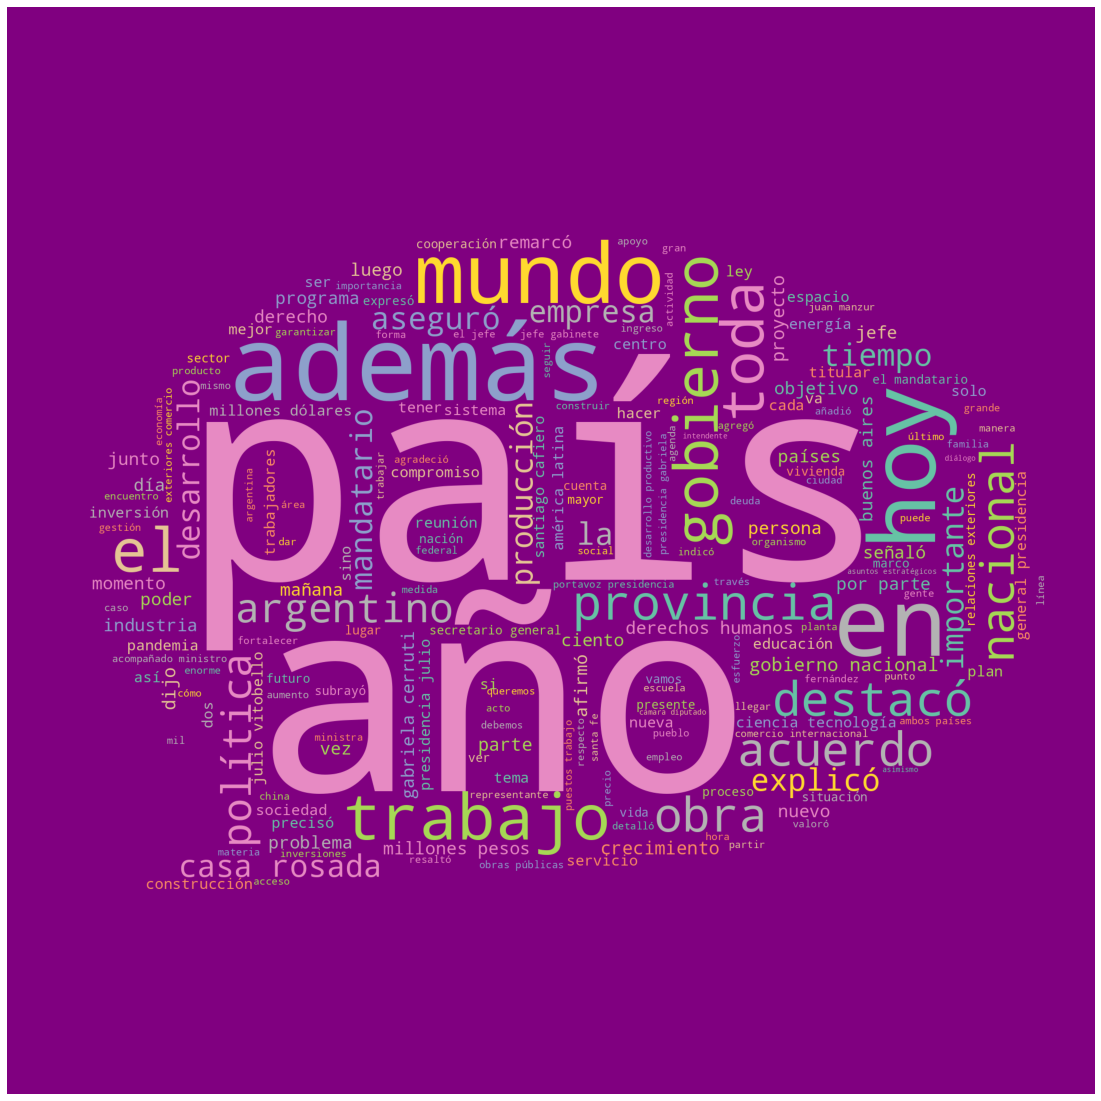

In [35]:
plt.figure(figsize=(24,20))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [36]:
wordcloud2.to_file('word_cloud_casa_rosada_silueta.png')

## Paquete ``newspaper``

[Documentación oficial](https://newspaper.readthedocs.io/en/latest/)

In [39]:
# !pip3 install newspaper3k

### Descagar un artículo

In [40]:
from newspaper import Article
 
url = 'https://www.infobae.com/economia/2022/07/02/desde-la-escuela-secundaria-hasta-el-auge-y-la-caida-la-historia-de-los-dos-jovenes-que-fundaron-three-arrows-el-ultimo-terremoto-cripto/'
 
# download and parse article
article = Article(url)
article.download()
article.parse()
 
# print article text
print(article.text)


Kyle Davies y Su Zhu recorrieron un largo camino. El lunes, la plataforma cripto que fundaron entró en liquidación en las Islas Vírgenes Británicas y ayer se presentó el pedido de quiebra en EEUU

El fondo de cobertura especializado en criptomonedas Three Arrows Capital, que el lunes pasado había entrado en liquidación, entró ayer en proceso de quiebra en EEUU, de modo que el fiscal designado pueda seguir el proceso de liquidación en su sede, en las Islas Vírgenes Británicas.

Three Arrows, conocido también como 3AC, era uno de los fondos de criptomonedas más conocidos, pero entró en un remolino de problemas debido al desplome de TerraUSD, una “stablecoin” algorítmica, y su proceso de liquidación se inició al no poder pagar USD 80 millones a otro fondo digital, Deribit.

La liquidación está a cargo de Teneo, una firma especializada en liquidaciones, que está evaluando qué activos tiene realmente 3AC y deberá luego crear un sitio web con instrucciones para los acreedores sobre cómo pone

### Obtener las imágines y videos de la noticias

In [45]:
article.movies
# article.publish_date
# article.summary
# article.images



[]

### Obtener los enlcases de un sitio

In [46]:
import newspaper
 
site = newspaper.build("https://www.clarin.com")  
 
# get list of article URLs
site.article_urls()

['https://www.clarin.com/economia/dolar-blue-hoy-cotiza-sabado-10-septiembre_0_kmc1kjVaEV.html',
 'https://www.clarin.com/mundo/coronacion-rey-carlos-vivo-proclamacion-nuevo-rey-gran-bretana-minuto-minuto_0_RnAWZdqw9V.html',
 'https://www.clarin.com/politica/bronca-basilica-lujan-misa-convirtio-acto-kirchnerista_0_iH4MzEbcQc.html',
 'https://www.clarin.com/policiales/-psicopata-manual-historia-doble-parricida-vicente-lopez-victimas_0_JUWd3eftiO.html',
 'https://www.clarin.com/politica/ataque-vicepresidenta-eufemismos-anibal-fernandez-bajar-furia-k_0_spqLzcgXAj.html',
 'https://www.clarin.com/deportes/la-previa-del-superclasico-boca-vs-river-en-vivo-la-reserva-es-el-mejor-aperitivo-para-calentar-la-previa_0_NMMWcrdEIF.html',
 'https://www.clarin.com/policiales/brutal-asalto-empresario-argentino-osvaldo-cornide-residencia-punta_0_9q0Y4DVdkc.html',
 'https://www.clarin.com/deportes/manu-ginobili-salon-fama-nba-hora-ver-transmision-vivo_0_769KJgtjsB.html',
 'https://www.clarin.com/espectac